In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

image_size = x_train.shape[1]
#x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
#x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.reshape((len(x_train), x_train.shape[1]*x_train.shape[1]))
x_test = x_test.reshape((len(x_test), x_test.shape[1]*x_test.shape[1]))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 784)

In [4]:
latent_dim = 32
#Encoder
input_image = Input(shape=(784, ))
x = Dense(500, activation='relu')(input_image)
x = Dense(250, activation='relu')(x)
x = Dense(100, activation='relu')(x)
latent_layer = Dense(latent_dim, activation='sigmoid')(x)
encoder = Model(input_image, latent_layer)
encoder.summary()

#Decoder
latent_inputs = Input(shape=(latent_dim, ))
d = Dense(100, activation='relu')(latent_inputs)
d = Dense(250, activation='relu')(d)
d = Dense(500, activation='relu')(d)
outputs = Dense(784, activation='sigmoid')(d)
decoder = Model(latent_inputs, outputs)
decoder.summary()

#autoencoder = encoder+decoder
autoencoder = Model(input_image,
                    decoder(encoder(input_image)),
                    name='autoencoder')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                3232      
Total params: 546,082
Trainable params: 546,082
Non-trainable params: 0
_________________________________________________________________
Model: "functional_3"
_________________________________________________________________
Layer (type)              

In [5]:
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4180 - val_loss: 0.3524
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3313 - val_loss: 0.3195
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3108 - val_loss: 0.3090
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3045 - val_loss: 0.3047
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3003 - val_loss: 0.3019
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2975 - val_loss: 0.2987
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2956 - val_loss: 0.2966
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2937 - val_loss: 0.2950
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2925 - val_loss: 0.2947
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2909 - val_loss: 0.2925

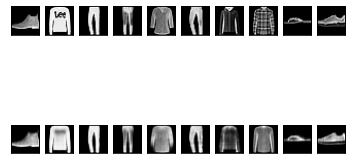

In [6]:
#using the test set
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

n = 10 #number of digits to display
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #Display reconstruction
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_images[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

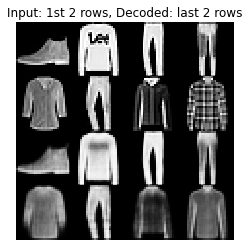

In [7]:
x_decoded = autoencoder.predict(x_test)

# display the 1st 8 test input and decoded images
imgs = np.concatenate([x_test[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.savefig('input_and_decoded.png')
plt.show()